In [20]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def visualize_states(counter, label1, counter2=None, label2=None, counter3=None, label3=None):
    """Plot state's frequencies."""
        
    fig, ax = plt.subplots(figsize=(5, 5 * 6/8))
    
    ax.set_title('State visualization')
    ax.set_xlabel('States')
    ax.set_ylabel('#')
    plt.xticks(rotation=90)
       
    for i, state in enumerate(counter):
        if i == 0 and counter2 is not None:
            ax.bar(state, counter[state], color='#C194D8', edgecolor="black", label=label1)
        else:
            ax.bar(state, counter[state], color='#C194D8', edgecolor="black")
            
    if counter2 is not None:
        for i, state in enumerate(counter2):
            if i == 0:
                ax.bar(state, counter2[state], color='orange', alpha=1, edgecolor="black", hatch="\\\\", facecolor="none", label=label2)
            else:
                ax.bar(state, counter2[state], color='orange', alpha=1, edgecolor="black", hatch="\\\\", facecolor="none")  
        plt.legend()
    if counter3 is not None:
        for i, state in enumerate(counter3):
            if i == 0:
                ax.bar(state, counter3[state], color='pink', alpha=1, edgecolor="black", hatch="////", facecolor="none", label=label3)
            else:
                ax.bar(state, counter3[state], color='pink', alpha=1, edgecolor="black", hatch="////", facecolor="none")  
        plt.legend()


def generate_bitstring_combinations(n):
    """Generate all bitstring combinations given bitstring length `n`."""
    bitstrings = []
    for i in range(2**n):
        bitstrings.append(format(i, f"0{n}b"))
    return bitstrings

In [21]:
aria1_frequencies = Counter({"001": 173, "100": 166, "000": 161, "101": 138, "011": 117, "010": 115, "110": 68, "111": 62})
harmony_frequencies = Counter({"110": 139, "111": 139, "101": 137, "001": 133, "100": 129, "000": 120, "010": 107, "011": 96})
local_simulator_frequencies = Counter({"100": 166, "101": 164, "000": 147, "001": 138, "110": 111, "011": 100, "111": 88, "010": 86})

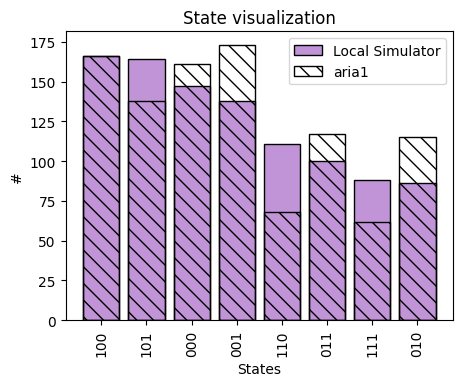

In [24]:
visualize_states(local_simulator_frequencies, "Local Simulator", aria1_frequencies, "aria1")

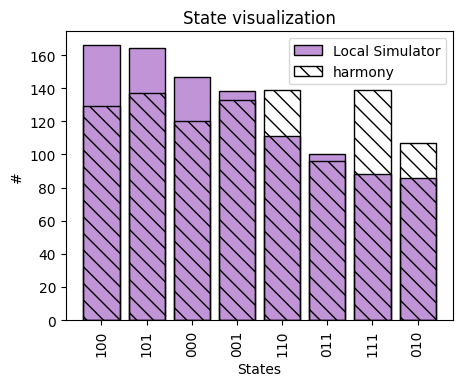

In [23]:
visualize_states(local_simulator_frequencies, "Local Simulator", harmony_frequencies, "harmony")